In [387]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [388]:
data = pd.read_csv("D:/ML/House Price Prediction/house-price-prediction-master/House_Data.csv")

In [389]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [390]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Preparing the Data
### Divide the data into attributes and labels

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

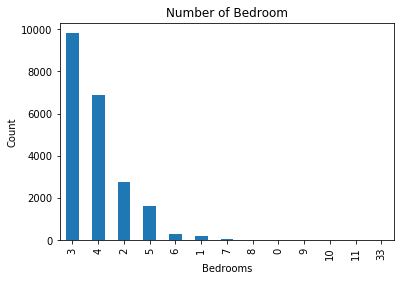

In [391]:
# Preparing a bar graph to understand most common houses to be choosed by people bedroom wise 

data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

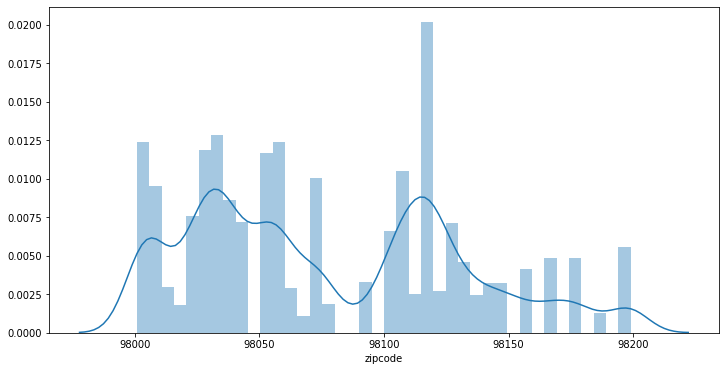

In [392]:
# Preparing a Visualization for the location of houses
plt.figure(figsize=[12,6])
sns.distplot(data['zipcode'],bins=40);

# 98100-98150 has the highest frequency 

Text(0.5, 1.0, 'Price vs Square Feet')

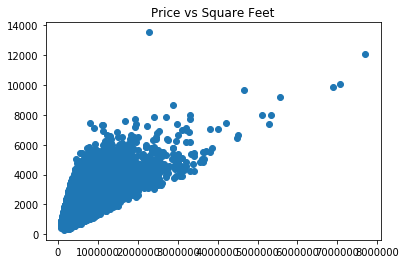

In [393]:
# Preparing a Scatter plot to view some common factors that would affect the prices of the house or not
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")
# It shows Positive Relationship
 

Text(0.5, 1.0, 'Latitude vs Price')

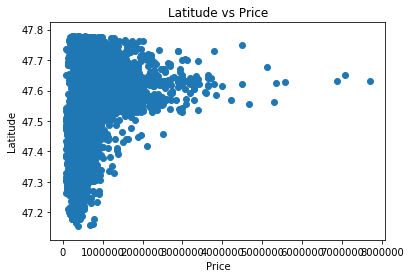

In [394]:
# Preparing a Scatter plot to view some common factors on the bases of location as well as Price .
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")
# It shows negative relationship

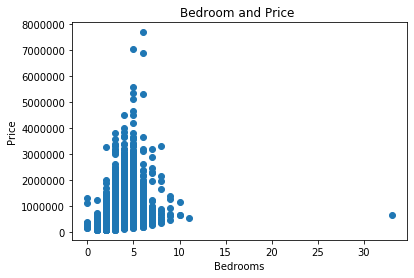

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [395]:
# Preparing a Scatter plot to view some common factors that would affect the prices and bedroom of the house or not.
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine
# It shows No Relationship

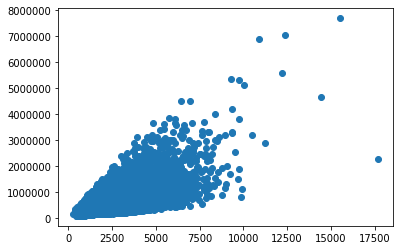

In [396]:
#Total sqft including basement vs Price (Scatter Plot)
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])
#It shows positiive relationship

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

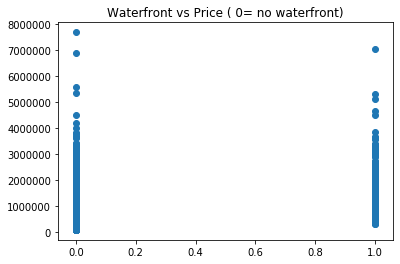

In [397]:
# Waterfront vs Price (Scatter Plot)
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [398]:
#Dropping ID and Price
train1 = data.drop(['id', 'price'],axis=1)

In [399]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


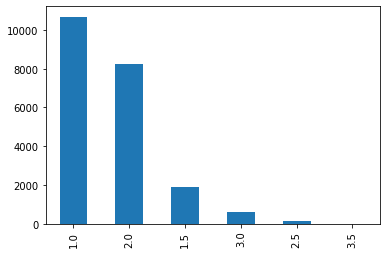

In [400]:
# Preparing a Bar Graph to undesrstand floor value
data.floors.value_counts().plot(kind='bar')

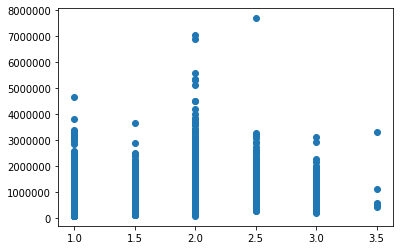

In [401]:
#Floors vs Price (Scatter Plot)
plt.scatter(data.floors,data.price)

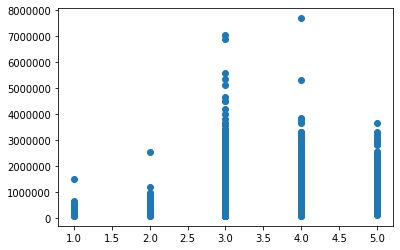

In [402]:
# Condition vs Price (Scatter Plot)
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

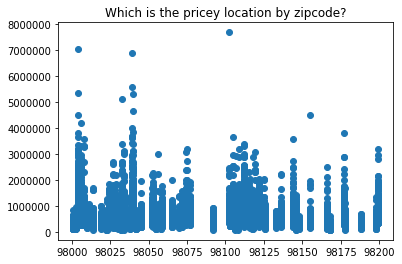

In [403]:
# Which location by zipcode is pricey ?
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

### Linear Regression


In [404]:
from sklearn.linear_model import LinearRegression

In [405]:
reg = LinearRegression()

In [406]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [407]:
# from sklearn.cross_validation import train_test_split

In [408]:
#conda install -c anaconda scikit-learn

In [409]:
#conda update -n base -c defaults conda

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [412]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [413]:
# Accuracy Score
reg.score(x_test,y_test)

0.7320342760357841

### Gradient Boosting Regressor

In [414]:
from sklearn import ensemble
#params ={ 'n_estimators' : 400, 'max_depth' : 5, 'min_samples_split' : 2,'learning_rate' : 0.1, 'loss' :'lad'}

In [415]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth= 5, min_samples_split = 2,
          learning_rate = 0.1, loss ='ls')

In [416]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [417]:
# Accuracy Score
clf.score(x_test,y_test)

0.9200758754228027

In [418]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [419]:
y_pred = reg.predict(x_test)

In [420]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [421]:
testsc = np.arange((params['n_estimators']))+1

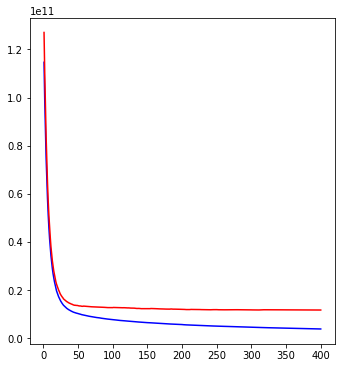

In [422]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [423]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [424]:
pca = PCA()

In [425]:
pca.fit_transform(scale(train1))

array([[-2.64785461e+00, -4.54699955e-02, -3.16665762e-01, ...,
        -7.94687728e-02, -6.61805472e-17,  0.00000000e+00],
       [-2.34485164e-01,  1.68297114e+00, -7.61521725e-01, ...,
         9.81487761e-01,  1.12981595e-14,  0.00000000e+00],
       [-2.57007792e+00, -6.14344122e-01,  3.49292423e-01, ...,
        -1.38570764e-01, -1.70354547e-16,  0.00000000e+00],
       ...,
       [-2.41985641e+00, -1.10027662e+00, -1.46293798e+00, ...,
         9.66785881e-01, -8.74844476e-17, -0.00000000e+00],
       [ 3.32183025e-01, -1.88043103e+00, -1.04412760e+00, ...,
        -3.97449542e-01,  9.30496289e-17,  0.00000000e+00],
       [-2.43180432e+00, -1.08505981e+00, -1.47248379e+00, ...,
         9.53674385e-01, -7.41169167e-17, -0.00000000e+00]])

### Random Forest Regressor

In [426]:
from sklearn.model_selection import train_test_split  

In [427]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)

In [428]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [429]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 71658.4365570922
Mean Squared Error: 18644393491.482574
Root Mean Squared Error: 136544.47440845994


In [430]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)

In [431]:
# If the number of estimators is changed to 50, the results are as follows:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)

In [432]:
# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 70379.58212978201
Mean Squared Error: 17807155993.320793
Root Mean Squared Error: 133443.45616522676


In [433]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [434]:
# Accuracy Score
clf.score(x_test,y_test)

0.9452829353143943